# Linear Regression with 1 variable

In [1]:
import sys
sys.path.extend(["../ml_models/", "../"])

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer, make_regression
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from linear import LinearRegression, RidgeRegression, LogisticRegression

%load_ext autoreload
%autoreload 2

In [2]:
X, y, coefficients = make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)
X = X.reshape(X.shape[0])

In [3]:
lr = LinearRegression()
lr.fit(X, y)

iter #:  22
change:  0.06788624814090927
iter #:  29
change:  0.015737231171063293
iter #:  39
change:  0.001312146317864027
iter #:  73
change:  7.63092991524772e-05
iter #:  88
change:  1.4532874590855727e-05
iter #:  97
change:  1.0015895721693369e-06
iter #:  111
change:  7.252213229946847e-08
iter #:  121
change:  1.315846986926772e-08
iter #:  125
change:  8.187113209601193e-10
iter #:  156
change:  7.543121682829224e-11
iter #:  191
change:  6.16751094639767e-12
iter #:  204
change:  1.284305994886381e-12
iter #:  238
change:  8.171241461241152e-14
iter #:  251
change:  1.2434497875801753e-14
iter #:  256
change:  0.0
gradient stopped changing


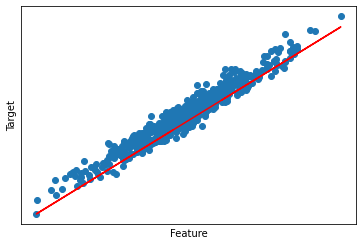

In [4]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), c='r')
plt.xlabel('Feature')
plt.ylabel('Target')
for i in ['x', 'y']:
    eval(f'plt.{i}ticks([])')
plt.show()

In [5]:
print(lr.w0, lr.w1)
coefficients

-5.236674786016311 21.697572482175538


array(20.64540589)

# Ridge Regression for unlimited number of variables

In [6]:
X, y, coefficients = make_regression(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_targets=1,
    noise=10,
    coef=True,
    random_state=1
)

In [7]:
rr = RidgeRegression()
rr.fit(X, y)

iter #:  19
change:  0.26510425165108686
iter #:  20
change:  0.021806159394469837
iter #:  21
change:  0.002141907227233064
iter #:  22
change:  0.00021381049639201954
iter #:  23
change:  2.1377254117105338e-05
iter #:  24
change:  2.1376874668188606e-06
iter #:  25
change:  2.1376836389919163e-07
iter #:  26
change:  2.1376830527941593e-08
iter #:  27
change:  2.1376849179688406e-09
iter #:  28
change:  2.1376522774119167e-10
iter #:  29
change:  2.1378898651391864e-11
iter #:  30
change:  2.135625010168951e-12
iter #:  31
change:  2.120525977034049e-13
iter #:  32
change:  2.4646951146678475e-14
iter #:  33
change:  2.220446049250313e-16
iter #:  34
change:  0.0
gradient stopped changing


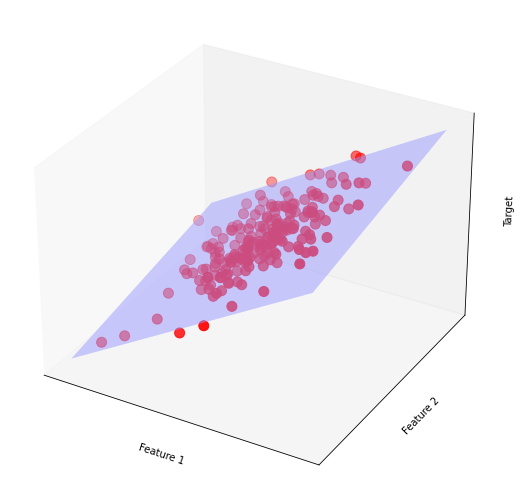

In [8]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
x0 = [X[:, 0].min(), X[:, 0].max()]
x1 = [X[:, 1].min(), X[:, 1].max()]
X0, X1 = np.meshgrid(x0, x1)
zs = rr.predict(np.concatenate([np.ravel(X0)[:, np.newaxis], 
                                np.ravel(X1)[:, np.newaxis]], axis=1))
Z = zs.reshape(X0.shape)

ax.scatter(X[:, 0], X[:, 1], y, c='r', s=100)
ax.plot_surface(X0, X1, Z, alpha=0.5, color="#9999ff", shade=False)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2 ')
ax.set_zlabel('Target')

for i in ['x', 'y', 'z']:
    eval(f'ax.set_{i}ticks([])')

plt.show()

In [9]:
rr.w, coefficients

(array([ 1.66207624, 45.94325926, 14.89005031]),
 array([51.90159841, 17.47201501]))

# Logistic regression

In [10]:
X, y = load_iris(return_X_y=True)
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
classifier = linear_model.LogisticRegression(random_state=42, max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
probs_y = classifier.predict_proba(X_test)

In [13]:
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format(
    "y_test",
    "y_pred", 
    "Setosa(%)",
    "versicolor(%)",
    "virginica(%)\n"
)
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.06          | 0.94      
1          | 1          | 0.01       | 0.96          | 0.03      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.02          | 0.98      
0          | 0          | 0.97       | 0.03          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.0        | 0.75          | 0.25      
1          | 1          | 0.0        | 0.74          | 0.26      
1          | 1          | 0.02       | 0.94          | 0.04      
2          | 2          | 0.0        | 0.16          | 0.84      
1          | 1          | 0.01       | 0.81          | 0.18      
1          | 1          | 0.0        | 0.79          | 0.2       
1       

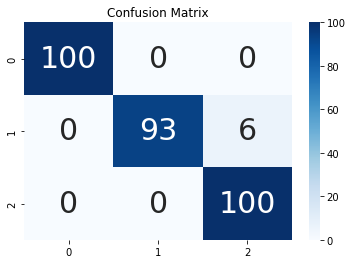

In [14]:
ax = plt.axes()
df_cm = (metrics.confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()